# Analyzing Insulin Clinical Trial Data 
------

In [1]:
import pandas as pd
import numpy as np

In [3]:
treatments_df = pd.read_csv('treatments_cleaned.csv')
treatments_df.head()

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,225,7.63,7.20,0.43,auralin,41,48,NaN
1,242,7.97,7.62,0.35,auralin,33,36,NaN
2,345,7.65,7.27,0.38,auralin,37,42,NaN
3,276,7.89,7.55,0.34,auralin,31,38,NaN
4,15,7.76,7.37,0.39,auralin,30,36,NaN


## Is the new treatment (Auralin) effective?

### Adverse Reactions
What are the side effects for ingectable and oral insulin?

In [7]:
treatments_df.groupby(['treatment', 'adverse_reaction']).size()

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
dtype: int64

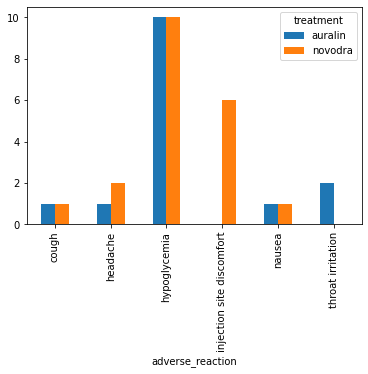

In [16]:
pd.crosstab(treatments_df.adverse_reaction, treatments_df.treatment).plot.bar();

For Auralin, throat irritation can be ecpected becuase this pill os taken orally and passes by the throat brfore it gets to the stomach.    
For Novodra, injection site discomfort is a common known side effect for injectabe insulin becuase of needles.

### Pre-trial/Pst-trial Mean Insulin Dose Change
Is the current dosage effective? (if not how much increase in expenses?)

In [18]:
treatments_df.columns

Index(['patient_id', 'hba1c_start', 'hba1c_end', 'hba1c_change', 'treatment',
       'dose_start', 'dose_end', 'adverse_reaction'],
      dtype='object')

In [19]:
treatments_df['dose_change'] = treatments_df.dose_end - treatments_df.dose_start

In [20]:
treatments_df.groupby('treatment').mean().dose_change

treatment
auralin    8.325714
novodra   -0.385057
Name: dose_change, dtype: float64

Comparing dose change means, the Auralin patients required on average 8 more units of insulin to establish a safe steady blood sugar level. On the other hand for Novodra, patients required on average about 0.4 units less of insulin.

### HbA1c Change
Diabetes Control Metric

In [21]:
hba1c_change_auralin = treatments_df[treatments_df.treatment == 'auralin'].hba1c_change
hba1c_change_novodra = treatments_df[treatments_df.treatment == 'novodra'].hba1c_change

In [36]:
treatments_df.groupby('treatment').mean().hba1c_change

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

In [82]:
import statsmodels.stats.api as sm 
t_test = sm.CompareMeans(sm.DescrStatsW(hba1c_change_novodra), sm.DescrStatsW(hba1c_change_auralin))

In [83]:
t_test.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0171,0.006,2.710,0.007,0.005,0.029


In [84]:
t_test.tconfint_diff(usevar='unequal') 

(0.004677519696701212, 0.029433481945334964)